In [2]:
import feast
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

## Step 1: Load Fact table:
Fact table includes:
- event_timestamp: timestamp of event.
- join_keys: to find relative feature views.
- label columns

In [3]:
data = pd.read_csv('loan_table.csv')
data['event_timestamp'] = pd.to_datetime('today').normalize()
data['is_approved'] = [0 if i%2 else 1 for i in range(data.shape[0])]
data

,dob_ssn,zipcode,event_timestamp,is_approved
0,19530219_5179,1463,2023-07-06,1
1,19781116_7723,80477,2023-07-06,0
2,19931128_5771,19401,2023-07-06,1
3,19500806_6783,31028,2023-07-06,0
4,19620322_7692,65802,2023-07-06,1
...,...,...,...,...
995,19930221_6706,19043,2023-07-06,0
996,19640928_1758,21851,2023-07-06,1
997,19820319_5187,27958,2023-07-06,0
998,19910515_1988,30327,2023-07-06,1


In [4]:
data.dtypes

dob_ssn                    object
zipcode                     int64
event_timestamp    datetime64[ns]
is_approved                 int64
dtype: object

In [5]:
fs = feast.FeatureStore('feast-ibm-test')
feature_service_v1 = fs.get_feature_service('feature_group_v3')

In [6]:
import pyarrow as pa

pa_table = pa.Table.from_pandas(data)

In [7]:
columns = [
    (f.name, f.type) for f in pa_table.schema
]
columns

[('dob_ssn', DataType(string)),
 ('zipcode', DataType(int64)),
 ('event_timestamp', TimestampType(timestamp[ns])),
 ('is_approved', DataType(int64))]

## Step 2: Get historical features:
sss

In [8]:
training_df = fs.get_historical_features(
    entity_df=data,
    features=feature_service_v1
).to_df()
training_df

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [dob_ssn-String]
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [zipcode-Int32]
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []


/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs.py:222: RuntimeWarning: The Azure Synapse + Azure SQL offline store is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


Check type: string
Check type: int64
Check type: int64
['"dob_ssn" varchar(127)', '"zipcode" bigint', '"event_timestamp" timestamp', '"is_approved" bigint']
['"dob_ssn" string', '"zipcode" int64', '"event_timestamp" timestamp[ns, tz=UTC]', '"is_approved" int64']

/*
 Compute a deterministic hash for the left_table_query_string that will be used throughout
 all the logic as the field to GROUP BY the data
*/
WITH entity_dataframe AS (
    SELECT *,
        event_timestamp AS entity_timestamp
        
            
            ,(
                
                    CAST(dob_ssn as VARCHAR) ||
                
                CAST(event_timestamp AS VARCHAR)
            ) AS credit_history__entity_row_unique_id
            
        
            
            ,(
                
                    CAST(zipcode as VARCHAR) ||
                
                CAST(event_timestamp AS VARCHAR)
            ) AS zipcode_features__entity_row_unique_id
            
        
    FROM feast_entity_df

,dob_ssn,zipcode,event_timestamp,is_approved,credit_card_due,mortgage_due,student_loan_due,vehicle_loan_due,hard_pulls,missed_payments_2y,...,missed_payments_6m,bankruptcies,city,state,location_type,tax_returns_filed,population,total_wages,sum_of_due,new_feature
0,19730605_6441,63939,2023-07-06,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
1,19730605_6441,63939,2023-07-06,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
2,19730605_6441,63939,2023-07-06,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
3,19730605_6441,63939,2023-07-06,1,1083,791170,48033,26152,10,6,...,0,0,FAIRDEALING,MO,PRIMARY,567,1090,13109575,866438,16
4,19530219_5179,1463,2023-07-06,1,8419,91803,22328,15078,0,1,...,0,0,PEPPERELL,MA,PRIMARY,5549,10100,310246738,137628,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,19640928_1758,21851,2023-07-06,1,8112,1904178,388,27059,1,7,...,1,0,POCOMOKE CITY,MD,PRIMARY,3441,5977,105001707,1939737,17
1223,19640928_1758,21851,2023-07-06,1,8112,1904178,388,27059,1,7,...,1,0,POCOMOKE CITY,MD,PRIMARY,3441,5977,105001707,1939737,17
1224,19820319_5187,27958,2023-07-06,0,1215,1099774,14355,11878,2,0,...,0,0,MOYOCK,NC,PRIMARY,4133,8123,177994696,1127222,10
1225,19910515_1988,30327,2023-07-06,1,1399,1342082,20844,18659,3,2,...,1,0,ATLANTA,GA,PRIMARY,16627,24665,1565488324,1382984,12


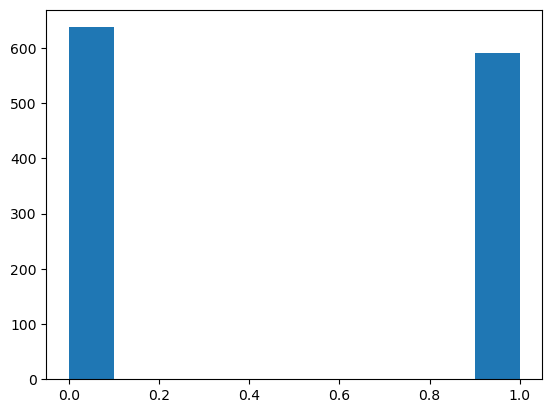

In [9]:
plt.hist(training_df['is_approved'])
plt.show()

In [10]:
from pprint import pprint

pprint(list(training_df.columns))

['dob_ssn',
 'zipcode',
 'event_timestamp',
 'is_approved',
 'credit_card_due',
 'mortgage_due',
 'student_loan_due',
 'vehicle_loan_due',
 'hard_pulls',
 'missed_payments_2y',
 'missed_payments_1y',
 'missed_payments_6m',
 'bankruptcies',
 'city',
 'state',
 'location_type',
 'tax_returns_filed',
 'population',
 'total_wages',
 'sum_of_due',
 'new_feature']


In [11]:
_feature_cols = list(training_df.columns)
_feature_cols.remove('is_approved')
feature_cols = [col for col in _feature_cols if 'timestamp' not in col]
X_train = training_df[feature_cols]
y_train = training_df['is_approved']

In [12]:
print(X_train.shape, y_train.shape)

(1227, 19) (1227,)


In [13]:
# Training simple model in here

## Step 3: Manual materialize to get newest dataset into Online Store:

In [14]:
fs.materialize_incremental(end_date=datetime.now())

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [dob_ssn-String]
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [zipcode-Int32]
Materializing 2 feature views to 2023-07-06 06:40:44+00:00 into the sqlite online store.

credit_history from 1923-07-31 06:40:44+00:00 to 2023-07-06 06:40:44+00:00:
Job id: credit_history-1923-07-31 06:40:44.706388+00:00-2023-07-06 06:40:44.659004+00:00


/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs.py:129: RuntimeWarning: The Azure Synapse + Azure SQL offline store is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


feature_view.batch_source.field_mapping: {}
table: pyarrow.Table
dob_ssn: string
credit_card_due: int64
mortgage_due: int64
student_loan_due: int64
vehicle_loan_due: int64
hard_pulls: int64
missed_payments_2y: int64
missed_payments_1y: int64
missed_payments_6m: int64
bankruptcies: int64
event_timestamp: timestamp[ns]
created_timestamp: timestamp[ns]
----
dob_ssn: [["19450101_7094","19450103_1272","19450121_1948","19450314_5717","19450329_4686",...,"20010905_3101","20011014_9383","20011116_7090","20011127_9138","20011201_2504"]]
credit_card_due: [[6964,308,1847,9752,3919,...,3278,5621,8031,7139,2486]]
mortgage_due: [[193665,399149,1087420,811146,620169,...,1674893,222437,855819,1866616,1152560]]
student_loan_due: [[13414,44470,9668,7972,39985,...,20649,32823,33189,7337,38187]]
vehicle_loan_due: [[14755,25345,24302,17551,29769,...,21597,27515,14883,6028,14591]]
hard_pulls: [[8,10,8,5,10,...,9,1,0,1,0]]
missed_payments_2y: [[3,2,2,0,3,...,7,1,5,1,1]]
missed_payments_1y: [[3,2,3,2,2,...,0,

  6%|███▊                                                        | 64/1000 [00:00<00:03, 253.27it/s]


online_write_batch
Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19450101_7094"
}

Values: {'credit_card_due': int64_val: 6964
, 'mortgage_due': int64_val: 193665
, 'student_loan_due': int64_val: 13414
, 'vehicle_loan_due': int64_val: 14755
, 'hard_pulls': int64_val: 8
, 'missed_payments_2y': int64_val: 3
, 'missed_payments_1y': int64_val: 3
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 2
}
What this: ['dob_ssn']   [string_val: "19450101_7094"
]
What this: string_val string_val: "19450101_7094"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19450103_1272"
}

Values: {'credit_card_due': int64_val: 308
, 'mortgage_due': int64_val: 399149
, 'student_loan_due': int64_val: 44470
, 'vehicle_loan_due': int64_val: 25345
, 'hard_pulls': int64_val: 10
, 'missed_payments_2y': int64_val: 2
, 'missed_payments_1y': int64_val: 2
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19450103

 18%|██████████▊                                                | 184/1000 [00:00<00:01, 449.29it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19520419_9095"
}

Values: {'credit_card_due': int64_val: 2364
, 'mortgage_due': int64_val: 1187232
, 'student_loan_due': int64_val: 41219
, 'vehicle_loan_due': int64_val: 10538
, 'hard_pulls': int64_val: 7
, 'missed_payments_2y': int64_val: 2
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 2
}
What this: ['dob_ssn']   [string_val: "19520419_9095"
]
What this: string_val string_val: "19520419_9095"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19520424_1840"
}

Values: {'credit_card_due': int64_val: 3079
, 'mortgage_due': int64_val: 1789243
, 'student_loan_due': int64_val: 15882
, 'vehicle_loan_due': int64_val: 7427
, 'hard_pulls': int64_val: 9
, 'missed_payments_2y': int64_val: 7
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 1
}
What this: ['dob_ssn']   [string_val: "19520424_1840"
]
What this:

 37%|██████████████████████                                     | 373/1000 [00:00<00:01, 578.44it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19580411_9996"
}

Values: {'credit_card_due': int64_val: 6499
, 'mortgage_due': int64_val: 1819439
, 'student_loan_due': int64_val: 27592
, 'vehicle_loan_due': int64_val: 11735
, 'hard_pulls': int64_val: 1
, 'missed_payments_2y': int64_val: 4
, 'missed_payments_1y': int64_val: 1
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19580411_9996"
]
What this: string_val string_val: "19580411_9996"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19580414_7667"
}

Values: {'credit_card_due': int64_val: 2023
, 'mortgage_due': int64_val: 1423045
, 'student_loan_due': int64_val: 5703
, 'vehicle_loan_due': int64_val: 17777
, 'hard_pulls': int64_val: 10
, 'missed_payments_2y': int64_val: 3
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19580414_7667"
]
What this

 50%|█████████████████████████████▋                             | 504/1000 [00:01<00:00, 619.58it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19651002_2255"
}

Values: {'credit_card_due': int64_val: 6625
, 'mortgage_due': int64_val: 298886
, 'student_loan_due': int64_val: 48250
, 'vehicle_loan_due': int64_val: 19426
, 'hard_pulls': int64_val: 1
, 'missed_payments_2y': int64_val: 5
, 'missed_payments_1y': int64_val: 1
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19651002_2255"
]
What this: string_val string_val: "19651002_2255"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19651104_2938"
}

Values: {'credit_card_due': int64_val: 8333
, 'mortgage_due': int64_val: 596584
, 'student_loan_due': int64_val: 25493
, 'vehicle_loan_due': int64_val: 10004
, 'hard_pulls': int64_val: 9
, 'missed_payments_2y': int64_val: 1
, 'missed_payments_1y': int64_val: 1
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19651104_2938"
]
What this: 

 64%|█████████████████████████████████████▌                     | 636/1000 [00:01<00:00, 633.91it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19731126_7943"
}

Values: {'credit_card_due': int64_val: 254
, 'mortgage_due': int64_val: 650514
, 'student_loan_due': int64_val: 34028
, 'vehicle_loan_due': int64_val: 15623
, 'hard_pulls': int64_val: 4
, 'missed_payments_2y': int64_val: 6
, 'missed_payments_1y': int64_val: 3
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19731126_7943"
]
What this: string_val string_val: "19731126_7943"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19740105_5509"
}

Values: {'credit_card_due': int64_val: 2479
, 'mortgage_due': int64_val: 893232
, 'student_loan_due': int64_val: 42929
, 'vehicle_loan_due': int64_val: 13452
, 'hard_pulls': int64_val: 2
, 'missed_payments_2y': int64_val: 7
, 'missed_payments_1y': int64_val: 3
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19740105_5509"
]
What this: s

 76%|█████████████████████████████████████████████              | 764/1000 [00:01<00:00, 615.17it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19810717_5916"
}

Values: {'credit_card_due': int64_val: 2803
, 'mortgage_due': int64_val: 1313201
, 'student_loan_due': int64_val: 9518
, 'vehicle_loan_due': int64_val: 15353
, 'hard_pulls': int64_val: 7
, 'missed_payments_2y': int64_val: 4
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19810717_5916"
]
What this: string_val string_val: "19810717_5916"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19810818_8129"
}

Values: {'credit_card_due': int64_val: 5317
, 'mortgage_due': int64_val: 1015741
, 'student_loan_due': int64_val: 16085
, 'vehicle_loan_due': int64_val: 16488
, 'hard_pulls': int64_val: 6
, 'missed_payments_2y': int64_val: 2
, 'missed_payments_1y': int64_val: 2
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19810818_8129"
]
What this:

 89%|████████████████████████████████████████████████████▌      | 891/1000 [00:01<00:00, 621.42it/s]

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19880123_1442"
}

Values: {'credit_card_due': int64_val: 3216
, 'mortgage_due': int64_val: 1615993
, 'student_loan_due': int64_val: 40477
, 'vehicle_loan_due': int64_val: 28062
, 'hard_pulls': int64_val: 8
, 'missed_payments_2y': int64_val: 3
, 'missed_payments_1y': int64_val: 2
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 2
}
What this: ['dob_ssn']   [string_val: "19880123_1442"
]
What this: string_val string_val: "19880123_1442"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19880126_6480"
}

Values: {'credit_card_due': int64_val: 6893
, 'mortgage_due': int64_val: 690613
, 'student_loan_due': int64_val: 10648
, 'vehicle_loan_due': int64_val: 4220
, 'hard_pulls': int64_val: 5
, 'missed_payments_2y': int64_val: 6
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19880126_6480"
]
What this: 

100%|██████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 545.02it/s]
/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19951214_6232"
}

Values: {'credit_card_due': int64_val: 9422
, 'mortgage_due': int64_val: 1543
, 'student_loan_due': int64_val: 24320
, 'vehicle_loan_due': int64_val: 7388
, 'hard_pulls': int64_val: 0
, 'missed_payments_2y': int64_val: 7
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 1
, 'bankruptcies': int64_val: 1
}
What this: ['dob_ssn']   [string_val: "19951214_6232"
]
What this: string_val string_val: "19951214_6232"

Entity key: join_keys: "dob_ssn"
entity_values {
  string_val: "19960102_1171"
}

Values: {'credit_card_due': int64_val: 505
, 'mortgage_due': int64_val: 1799895
, 'student_loan_due': int64_val: 27182
, 'vehicle_loan_due': int64_val: 2859
, 'hard_pulls': int64_val: 1
, 'missed_payments_2y': int64_val: 4
, 'missed_payments_1y': int64_val: 0
, 'missed_payments_6m': int64_val: 0
, 'bankruptcies': int64_val: 0
}
What this: ['dob_ssn']   [string_val: "19960102_1171"
]
What this: stri

/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs.py:129: RuntimeWarning: The Azure Synapse + Azure SQL offline store is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


zipcode_features from 1923-07-31 06:40:57+00:00 to 2023-07-06 06:40:44+00:00:
Job id: zipcode_features-1923-07-31 06:40:57.477789+00:00-2023-07-06 06:40:44.659004+00:00
feature_view.batch_source.field_mapping: {}
table: pyarrow.Table
zipcode: int64
city: string
state: string
location_type: string
tax_returns_filed: int64
population: int64
total_wages: int64
event_timestamp: timestamp[ns]
created_timestamp: timestamp[ns]
----
zipcode: [[1001,1007,1026,1035,1037,...,99740,99741,99803,99827,99921]]
city: [["AGAWAM","BELCHERTOWN","CUMMINGTON","HADLEY","HARDWICK",...,"FORT YUKON","GALENA","JUNEAU","HAINES","CRAIG"]]
state: [["MA","MA","MA","MA","MA",...,"AK","AK","AK","AK","AK"]]
location_type: [["PRIMARY","PRIMARY","PRIMARY","PRIMARY","PRIMARY",...,"PRIMARY","PRIMARY","PRIMARY","PRIMARY","PRIMARY"]]
tax_returns_filed: [[8596,7097,520,2617,388,...,278,269,2223,1331,824]]
population: [[14021,12895,865,4327,714,...,420,441,3545,2152,1367]]
total_wages: [[337735143,342529324,15391058,97134728,

  3%|██                                                          | 93/2729 [00:00<00:09, 276.62it/s]


online_write_batch
Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 1001
}

Values: {'city': string_val: "AGAWAM"
, 'state': string_val: "MA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 8596
, 'population': int64_val: 14021
, 'total_wages': int64_val: 337735143
}
What this: ['zipcode']   [int32_val: 1001
]
What this: int32_val int32_val: 1001

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 1007
}

Values: {'city': string_val: "BELCHERTOWN"
, 'state': string_val: "MA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 7097
, 'population': int64_val: 12895
, 'total_wages': int64_val: 342529324
}
What this: ['zipcode']   [int32_val: 1007
]
What this: int32_val int32_val: 1007

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 1026
}

Values: {'city': string_val: "CUMMINGTON"
, 'state': string_val: "MA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 520
, 'population'

 13%|███████▊                                                   | 362/2729 [00:00<00:03, 678.09it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 7503
}

Values: {'city': string_val: "PATERSON"
, 'state': string_val: "NJ"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 8454
, 'population': int64_val: 14649
, 'total_wages': int64_val: 213985183
}
What this: ['zipcode']   [int32_val: 7503
]
What this: int32_val int32_val: 7503

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 7605
}

Values: {'city': string_val: "LEONIA"
, 'state': string_val: "NJ"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 4156
, 'population': int64_val: 7589
, 'total_wages': int64_val: 259754085
}
What this: ['zipcode']   [int32_val: 7605
]
What this: int32_val int32_val: 7605

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 7620
}

Values: {'city': string_val: "ALPINE"
, 'state': string_val: "NJ"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 970
, 'population': int64_val: 1696
, 'total_w

 20%|███████████▌                                               | 536/2729 [00:00<00:02, 778.53it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 14167
}

Values: {'city': string_val: "VARYSBURG"
, 'state': string_val: "NY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 795
, 'population': int64_val: 1383
, 'total_wages': int64_val: 27640706
}
What this: ['zipcode']   [int32_val: 14167
]
What this: int32_val int32_val: 14167

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 14174
}

Values: {'city': string_val: "YOUNGSTOWN"
, 'state': string_val: "NY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 2925
, 'population': int64_val: 5187
, 'total_wages': int64_val: 121049602
}
What this: ['zipcode']   [int32_val: 14174
]
What this: int32_val int32_val: 14174

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 14204
}

Values: {'city': string_val: "BUFFALO"
, 'state': string_val: "NY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 3294
, 'population': int64_val: 5302

 26%|███████████████▎                                           | 709/2729 [00:01<00:02, 805.38it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 21009
}

Values: {'city': string_val: "ABINGDON"
, 'state': string_val: "MD"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 14151
, 'population': int64_val: 25308
, 'total_wages': int64_val: 779581367
}
What this: ['zipcode']   [int32_val: 21009
]
What this: int32_val int32_val: 21009

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 21014
}

Values: {'city': string_val: "BEL AIR"
, 'state': string_val: "MD"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 17433
, 'population': int64_val: 31074
, 'total_wages': int64_val: 936065910
}
What this: ['zipcode']   [int32_val: 21014
]
What this: int32_val int32_val: 21014

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 21040
}

Values: {'city': string_val: "EDGEWOOD"
, 'state': string_val: "MD"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 11222
, 'population': int64_val: 

 32%|███████████████████                                        | 879/2729 [00:01<00:02, 811.14it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 27959
}

Values: {'city': string_val: "NAGS HEAD"
, 'state': string_val: "NC"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1523
, 'population': int64_val: 2496
, 'total_wages': int64_val: 44156270
}
What this: ['zipcode']   [int32_val: 27959
]
What this: int32_val int32_val: 27959

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 27965
}

Values: {'city': string_val: "POPLAR BRANCH"
, 'state': string_val: "NC"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 253
, 'population': int64_val: 424
, 'total_wages': int64_val: 6252364
}
What this: ['zipcode']   [int32_val: 27965
]
What this: int32_val int32_val: 27965

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 28001
}

Values: {'city': string_val: "ALBEMARLE"
, 'state': string_val: "NC"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 10376
, 'population': int64_val: 1

 39%|██████████████████████▍                                   | 1056/2729 [00:01<00:01, 849.64it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 32183
}

Values: {'city': string_val: "OCKLAWAHA"
, 'state': string_val: "FL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 560
, 'population': int64_val: 951
, 'total_wages': int64_val: 12547019
}
What this: ['zipcode']   [int32_val: 32183
]
What this: int32_val int32_val: 32183

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 32189
}

Values: {'city': string_val: "SATSUMA"
, 'state': string_val: "FL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 2102
, 'population': int64_val: 3641
, 'total_wages': int64_val: 43126165
}
What this: ['zipcode']   [int32_val: 32189
]
What this: int32_val int32_val: 32189

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 32202
}

Values: {'city': string_val: "JACKSONVILLE"
, 'state': string_val: "FL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1536
, 'population': int64_val: 2088

 45%|██████████████████████████▏                               | 1232/2729 [00:01<00:01, 861.77it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 37724
}

Values: {'city': string_val: "CUMBERLAND GAP"
, 'state': string_val: "TN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 863
, 'population': int64_val: 1614
, 'total_wages': int64_val: 24587713
}
What this: ['zipcode']   [int32_val: 37724
]
What this: int32_val int32_val: 37724

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 37727
}

Values: {'city': string_val: "DEL RIO"
, 'state': string_val: "TN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 824
, 'population': int64_val: 1541
, 'total_wages': int64_val: 18971575
}
What this: ['zipcode']   [int32_val: 37727
]
What this: int32_val int32_val: 37727

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 37752
}

Values: {'city': string_val: "HARROGATE"
, 'state': string_val: "TN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 2616
, 'population': int64_val: 48

 52%|█████████████████████████████▉                            | 1409/2729 [00:01<00:01, 856.04it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 44611
}

Values: {'city': string_val: "BIG PRAIRIE"
, 'state': string_val: "OH"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 860
, 'population': int64_val: 1510
, 'total_wages': int64_val: 24298782
}
What this: ['zipcode']   [int32_val: 44611
]
What this: int32_val int32_val: 44611

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 44634
}

Values: {'city': string_val: "HOMEWORTH"
, 'state': string_val: "OH"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1038
, 'population': int64_val: 1868
, 'total_wages': int64_val: 34751769
}
What this: ['zipcode']   [int32_val: 44634
]
What this: int32_val int32_val: 44634

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 44643
}

Values: {'city': string_val: "MAGNOLIA"
, 'state': string_val: "OH"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1532
, 'population': int64_val: 269

 58%|█████████████████████████████████▋                        | 1586/2729 [00:02<00:01, 868.07it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 49287
}

Values: {'city': string_val: "TIPTON"
, 'state': string_val: "MI"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1034
, 'population': int64_val: 1917
, 'total_wages': int64_val: 40179950
}
What this: ['zipcode']   [int32_val: 49287
]
What this: int32_val int32_val: 49287

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 49322
}

Values: {'city': string_val: "CORAL"
, 'state': string_val: "MI"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 467
, 'population': int64_val: 889
, 'total_wages': int64_val: 13648922
}
What this: ['zipcode']   [int32_val: 49322
]
What this: int32_val int32_val: 49322

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 49404
}

Values: {'city': string_val: "COOPERSVILLE"
, 'state': string_val: "MI"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 3812
, 'population': int64_val: 7010
, 't

 65%|█████████████████████████████████████▍                    | 1762/2729 [00:02<00:01, 863.85it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 56026
}

Values: {'city': string_val: "ELLENDALE"
, 'state': string_val: "MN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 959
, 'population': int64_val: 1719
, 'total_wages': int64_val: 31827756
}
What this: ['zipcode']   [int32_val: 56026
]
What this: int32_val int32_val: 56026

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 56044
}

Values: {'city': string_val: "HENDERSON"
, 'state': string_val: "MN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 995
, 'population': int64_val: 1755
, 'total_wages': int64_val: 37014136
}
What this: ['zipcode']   [int32_val: 56044
]
What this: int32_val int32_val: 56044

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 56093
}

Values: {'city': string_val: "WASECA"
, 'state': string_val: "MN"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 5904
, 'population': int64_val: 10276
, 

 71%|█████████████████████████████████████████▏                | 1939/2729 [00:02<00:00, 863.39it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 62292
}

Values: {'city': string_val: "TILDEN"
, 'state': string_val: "IL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 407
, 'population': int64_val: 703
, 'total_wages': int64_val: 9172253
}
What this: ['zipcode']   [int32_val: 62292
]
What this: int32_val int32_val: 62292

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 62314
}

Values: {'city': string_val: "BAYLIS"
, 'state': string_val: "IL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 278
, 'population': int64_val: 514
, 'total_wages': int64_val: 7225452
}
What this: ['zipcode']   [int32_val: 62314
]
What this: int32_val int32_val: 62314

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 62326
}

Values: {'city': string_val: "COLCHESTER"
, 'state': string_val: "IL"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1216
, 'population': int64_val: 2079
, 'total_

 78%|████████████████████████████████████████████▉             | 2115/2729 [00:02<00:00, 858.32it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 68959
}

Values: {'city': string_val: "MINDEN"
, 'state': string_val: "NE"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1813
, 'population': int64_val: 3260
, 'total_wages': int64_val: 52873387
}
What this: ['zipcode']   [int32_val: 68959
]
What this: int32_val int32_val: 68959

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 68978
}

Values: {'city': string_val: "SUPERIOR"
, 'state': string_val: "NE"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1155
, 'population': int64_val: 1993
, 'total_wages': int64_val: 25405139
}
What this: ['zipcode']   [int32_val: 68978
]
What this: int32_val int32_val: 68978

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 69024
}

Values: {'city': string_val: "CULBERTSON"
, 'state': string_val: "NE"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 560
, 'population': int64_val: 1020
, 

 84%|████████████████████████████████████████████████▌         | 2286/2729 [00:03<00:00, 838.37it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 75960
}

Values: {'city': string_val: "MOSCOW"
, 'state': string_val: "TX"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 382
, 'population': int64_val: 717
, 'total_wages': int64_val: 11714217
}
What this: ['zipcode']   [int32_val: 75960
]
What this: int32_val int32_val: 75960

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 75972
}

Values: {'city': string_val: "SAN AUGUSTINE"
, 'state': string_val: "TX"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 2694
, 'population': int64_val: 4840
, 'total_wages': int64_val: 65068750
}
What this: ['zipcode']   [int32_val: 75972
]
What this: int32_val int32_val: 75972

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 76017
}

Values: {'city': string_val: "ARLINGTON"
, 'state': string_val: "TX"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 20979
, 'population': int64_val: 375

 90%|████████████████████████████████████████████████████▎     | 2460/2729 [00:03<00:00, 853.90it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 82933
}

Values: {'city': string_val: "FORT BRIDGER"
, 'state': string_val: "WY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 376
, 'population': int64_val: 706
, 'total_wages': int64_val: 16480206
}
What this: ['zipcode']   [int32_val: 82933
]
What this: int32_val int32_val: 82933

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 83014
}

Values: {'city': string_val: "WILSON"
, 'state': string_val: "WY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1496
, 'population': int64_val: 2334
, 'total_wages': int64_val: 96854336
}
What this: ['zipcode']   [int32_val: 83014
]
What this: int32_val int32_val: 83014

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 83110
}

Values: {'city': string_val: "AFTON"
, 'state': string_val: "WY"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 1822
, 'population': int64_val: 3543
, 't

 96%|███████████████████████████████████████████████████████▉  | 2633/2729 [00:03<00:00, 829.71it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 92562
}

Values: {'city': string_val: "MURRIETA"
, 'state': string_val: "CA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 23762
, 'population': int64_val: 45927
, 'total_wages': int64_val: 1191210837
}
What this: ['zipcode']   [int32_val: 92562
]
What this: int32_val int32_val: 92562

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 92570
}

Values: {'city': string_val: "PERRIS"
, 'state': string_val: "CA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 16762
, 'population': int64_val: 33297
, 'total_wages': int64_val: 488394932
}
What this: ['zipcode']   [int32_val: 92570
]
What this: int32_val int32_val: 92570

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 92593
}

Values: {'city': string_val: "TEMECULA"
, 'state': string_val: "CA"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 895
, 'population': int64_val: 16

100%|██████████████████████████████████████████████████████████| 2729/2729 [00:03<00:00, 766.58it/s]

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 97862
}

Values: {'city': string_val: "MILTON FREEWATER"
, 'state': string_val: "OR"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 4570
, 'population': int64_val: 8481
, 'total_wages': int64_val: 122656785
}
What this: ['zipcode']   [int32_val: 97862
]
What this: int32_val int32_val: 97862

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 97867
}

Values: {'city': string_val: "NORTH POWDER"
, 'state': string_val: "OR"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 325
, 'population': int64_val: 613
, 'total_wages': int64_val: 7302914
}
What this: ['zipcode']   [int32_val: 97867
]
What this: int32_val int32_val: 97867

Entity key: join_keys: "zipcode"
entity_values {
  int32_val: 97870
}

Values: {'city': string_val: "RICHLAND"
, 'state': string_val: "OR"
, 'location_type': string_val: "PRIMARY"
, 'tax_returns_filed': int64_val: 269
, 'population': int64_va


/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


## Step 4: Get online features in order to Inference:
sss

In [32]:
online_data = [
    {'zipcode': 63939, 'dob_ssn': '19730605_6441'},
    {'zipcode': 1463, 'dob_ssn': '19530219_5179'},
]
online_data

[{'zipcode': 63939, 'dob_ssn': '19730605_6441'},
 {'zipcode': 1463, 'dob_ssn': '19530219_5179'}]

In [33]:
feature_vector = fs.get_online_features(
    entity_rows=online_data,
    features=feature_service_v1
).to_dict()

db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [dob_ssn-String]
db2_fs_source -> from_proto:
Db2ServerSource -> field_mapping: {}
Db2ServerSource -> type(field_mapping): <class 'dict'>
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> entity columns 2 [zipcode-Int32]
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
feature_view.py -> Join keys: []
feature_view.py -> entity_columns 1: []
What this: ['dob_ssn']   [string_val: "19530219_5179"
]
What this: string_val string_val: "19530219_5179"

What this: ['dob_ssn']   [string_val: "19730605_6441"
]
What this: string_val string_val: "19730605_6441"

W

/opt/conda/lib/python3.10/site-packages/feast_ibm_db2-0.0.1-py3.10.egg/feast_ibm_db2/db2_fs_source.py:151: RuntimeWarning: The Azure Synapse + Azure SQL data source is an experimental feature in alpha development. Some functionality may still be unstable so functionality can change in the future.


In [34]:
feature_vector = pd.DataFrame(feature_vector)
feature_vector

,zipcode,dob_ssn,mortgage_due,missed_payments_6m,credit_card_due,student_loan_due,vehicle_loan_due,hard_pulls,missed_payments_2y,missed_payments_1y,bankruptcies,tax_returns_filed,population,location_type,state,total_wages,city,new_feature,sum_of_due
0,63939,19730605_6441,791170,0,1083,48033,26152,10,6,0,0,567,1090,PRIMARY,MO,13109575,FAIRDEALING,16,866438
1,1463,19530219_5179,91803,0,8419,22328,15078,0,1,0,0,5549,10100,PRIMARY,MA,310246738,PEPPERELL,11,137628
